In [113]:
import sys; sys.path.insert(0, '..') # necessary for successful custom module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.jump_vasicek import JumpVasicek
from models.vasicek import Vasicek
from pricing.pricing import Pricing
from models.cir import CIR
from models.jump_cir import JumpCIR
import warnings
warnings.filterwarnings("ignore")

# VASICEK - BOND

In [114]:
fitted_params = {
    "kappa": 0.09379583,
    "mu_r": 0.03578758,
    "sigma": 0.01,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [115]:
xls = pd.ExcelFile('../data/yield_curve15022021.xlsx')
yield_curve = pd.read_excel(xls, 'Sheet1')
yield_curve = yield_curve.set_index('Dates')

In [116]:
yield_curve_2_5_21 = pd.DataFrame((yield_curve[yield_curve.index == '2/5/2021']).T.values/100)
yield_curve_2_5_21['DATE'] = yield_curve.columns
yield_curve_2_5_21.columns = ['YIELD','DATE']

In [117]:
def convert_to_years(row):
    if 'M' in row['DATE']:
        return int(row['DATE'].split('M')[0])/12
    elif 'Y' in row['DATE']:
        return int(row['DATE'].split('Y')[0])
    
yield_curve_2_5_21['YEARS'] = yield_curve_2_5_21.apply(convert_to_years, axis=1)

In [118]:
yield_curve_2_5_21['PRICE'] = np.exp(-yield_curve_2_5_21['YEARS']*yield_curve_2_5_21['YIELD'])
yield_curve_2_5_21 = yield_curve_2_5_21.set_index('DATE')

In [119]:
vasicek = Vasicek(fitted_params)
pricing = Pricing(vasicek)

In [120]:
prices = np.empty(len(yield_curve_2_5_21))
std = np.empty(len(yield_curve_2_5_21))

i = 0
for t in yield_curve_2_5_21['YEARS'].values:
    prices[i], std[i] = pricing.bond_price(26, 0.001, 100, t)
    i = i+1

In [121]:
yield_curve_2_5_21['PREDICTED PRICE'] = prices

<AxesSubplot:title={'center':'VASICEK - BOND PRICES'}, xlabel='DATE'>

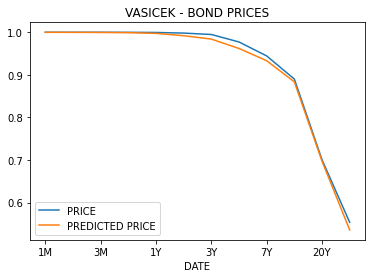

In [122]:
yield_curve_2_5_21[['PRICE', 'PREDICTED PRICE']].plot(legend=True, title='VASICEK - BOND PRICES')

In [123]:
std

array([4.62094683e-08, 2.32709417e-07, 4.41035273e-07, 2.39842229e-06,
       2.21642663e-05, 1.85286674e-04, 4.84751303e-04, 2.37322804e-03,
       4.02130639e-03, 1.09170581e-02, 3.78072891e-02, 6.53062363e-02])

In [128]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[:5].mean()

0.0007473973910381071

In [129]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[6:].mean()

0.010869933442694268

In [130]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE']).mean()

0.006256275316531372

# JUMP VASICEK - BOND

In [131]:
fitted_params = {
    "kappa": 0.2719052,
    "mu_r": 0.03017724,
    "sigma": 0.01,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [132]:
jump_vasicek = JumpVasicek(fitted_params)
jump_pricing = Pricing(jump_vasicek)

In [133]:
prices = np.empty(len(yield_curve_2_5_21))
std = np.empty(len(yield_curve_2_5_21))

i = 0
for t in yield_curve_2_5_21['YEARS'].values:
    prices[i], std[i] = jump_pricing.bond_price(26, 0.001, 100, t)
    i = i+1

<AxesSubplot:title={'center':'JUMP VASICEK - BOND PRICES'}, xlabel='DATE'>

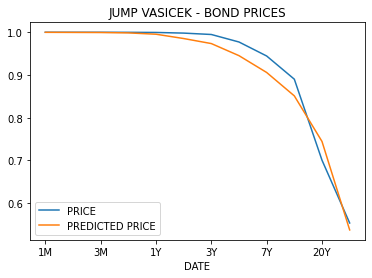

In [134]:
yield_curve_2_5_21['PREDICTED PRICE'] = prices
yield_curve_2_5_21[['PRICE', 'PREDICTED PRICE']].plot(legend=True, title='JUMP VASICEK - BOND PRICES')

In [135]:
std

array([9.89304027e-07, 2.98678292e-06, 9.53236469e-06, 3.53937476e-05,
       2.71231054e-04, 1.12666473e-03, 6.81131594e-03, 2.22702374e-02,
       2.85051447e-02, 4.28476851e-02, 2.23278389e-01, 1.32948107e-01])

In [139]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[:5].mean()

0.0013172109303445812

In [140]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[6:].mean()

0.03180582035410832

# VASICEK - SWAP

In [141]:
xls = pd.ExcelFile('../data/treasury_swap_feb05.xlsx')
swap_rates = pd.read_excel(xls, 'Sheet1')[1:]
swap_rates.index = swap_rates['Term']

In [142]:
swap_rates['Mid'] = swap_rates['Mid']/100

In [143]:
sr = np.empty(len(swap_rates))
std = np.empty(len(swap_rates))

i = 0
for index, row in swap_rates.iterrows():
    T = int(row['Term'].split(" YR")[0])
    T = np.arange(T*2)/2
    sr[i], std[i] = pricing.swap_rate(26, 0.001, 100, 2, T)
    i = i + 1

<AxesSubplot:title={'center':'VASICEK - SWAP RATES'}, xlabel='Term'>

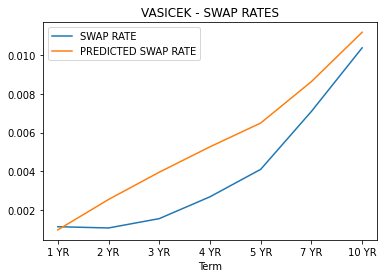

In [144]:
swap_rates['SWAP RATE'] = swap_rates['Mid']
swap_rates['PREDICTED SWAP RATE'] = sr
swap_rates[['SWAP RATE', 'PREDICTED SWAP RATE']].plot(legend=True, title='VASICEK - SWAP RATES')

In [145]:
std

array([2.64734604e-06, 4.25412399e-05, 1.26348767e-04, 2.15516936e-04,
       2.71352693e-04, 5.63843664e-04, 1.00064783e-03])

In [149]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[:3].mean()

0.0013450356041445424

In [150]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[4:].mean()

0.001578474703860751

# JUMP VASICEK - SWAP

In [151]:
sr = np.empty(len(swap_rates))
std = np.empty(len(swap_rates))

i = 0
for index, row in swap_rates.iterrows():
    T = int(row['Term'].split(" YR")[0])
    T = np.arange(T*2)/2
    sr[i], std[i] = jump_pricing.swap_rate(26, 0.001, 100, 2, T)
    i = i + 1

<AxesSubplot:title={'center':'JUMP VASICEK - SWAP RATES'}, xlabel='Term'>

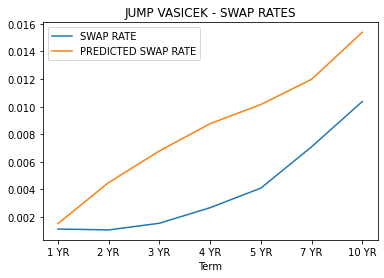

In [152]:
swap_rates['SWAP RATE'] = swap_rates['Mid']
swap_rates['PREDICTED SWAP RATE'] = sr
swap_rates[['SWAP RATE', 'PREDICTED SWAP RATE']].plot(legend=True, title='JUMP VASICEK - SWAP RATES')

In [153]:
std

array([5.95737773e-05, 5.01975815e-04, 1.40633560e-03, 1.98013784e-03,
       2.94187962e-03, 4.52947277e-03, 4.68554399e-03])

In [155]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[:3].mean()

0.0030201989367182563

In [156]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[4:].mean()

0.005321040074476982

# CIR - BOND

In [157]:
fitted_params = {
    "kappa": 0.07667018,
    "mu_r": 0.04420769,
    "sigma": 0.11789453,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [158]:
cir = CIR(fitted_params)
pricing_cir = Pricing(cir)

In [159]:
prices = np.empty(len(yield_curve_2_5_21))
std = np.empty(len(yield_curve_2_5_21))

i = 0
for t in yield_curve_2_5_21['YEARS'].values:
    prices[i], std[i] = pricing_cir.bond_price(26, 0.001, 100, t)
    i = i+1

<AxesSubplot:title={'center':'CIR - BOND PRICES'}, xlabel='DATE'>

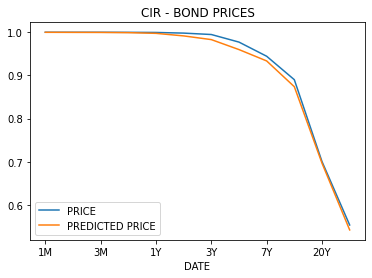

In [160]:
yield_curve_2_5_21['PREDICTED PRICE'] = prices
yield_curve_2_5_21[['PRICE', 'PREDICTED PRICE']].plot(legend=True, title='CIR - BOND PRICES')


In [161]:
std

array([2.37036559e-05, 5.43025203e-05, 1.13209040e-04, 3.39559656e-04,
       1.10932992e-03, 4.46448756e-03, 9.35390052e-03, 2.47070219e-02,
       3.30318878e-02, 5.99453866e-02, 1.04606956e-01, 1.19237319e-01])

In [163]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[:5].mean()

0.0007269204621021874

In [164]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[6:].mean()

0.011892039343525266

# CIR - SWAP

In [165]:
sr = np.empty(len(swap_rates))
std = np.empty(len(swap_rates))

i = 0
for index, row in swap_rates.iterrows():
    T = int(row['Term'].split(" YR")[0])
    T = np.arange(T*2)/2
    sr[i], std[i] = pricing_cir.swap_rate(26, 0.001, 100, 2, T)
    i = i + 1

<AxesSubplot:title={'center':'CIR - SWAP RATES'}, xlabel='Term'>

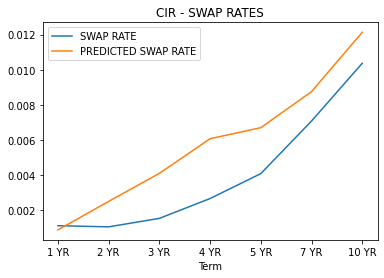

In [166]:
swap_rates['SWAP RATE'] = swap_rates['Mid']
swap_rates['PREDICTED SWAP RATE'] = sr
swap_rates[['SWAP RATE', 'PREDICTED SWAP RATE']].plot(legend=True, title='CIR - SWAP RATES')

In [167]:
std

array([0.00030548, 0.00110275, 0.00222579, 0.00323816, 0.00317243,
       0.00417333, 0.00573109])

In [169]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[:3].mean()

0.0014151792250699138

In [170]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[4:].mean()

0.0020158020212531886

# JUMP CIR - BOND

In [185]:
fitted_params = {
    "kappa": 0.00329184,
    "mu_r": 0.001,
    "sigma": 0.04480743,
    "mu": 0,
    "gamma": 0.11385074,
    "h": 10
}


In [186]:
jump_cir = JumpCIR(fitted_params)
pricing_jump_cir = Pricing(jump_cir)

In [187]:
prices = np.empty(len(yield_curve_2_5_21))
std = np.empty(len(yield_curve_2_5_21))

i = 0
for t in yield_curve_2_5_21['YEARS'].values:
    prices[i], std[i] = pricing_jump_cir.bond_price(26, 0.001, 100, t)
    i = i+1

<AxesSubplot:title={'center':'JUMP CIR - BOND PRICES'}, xlabel='DATE'>

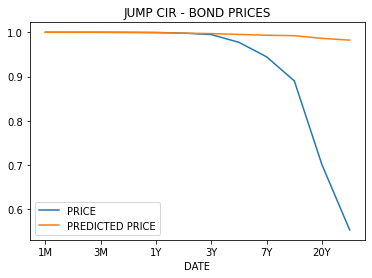

In [188]:
yield_curve_2_5_21['PREDICTED PRICE'] = prices
yield_curve_2_5_21[['PRICE', 'PREDICTED PRICE']].plot(legend=True, title='JUMP CIR - BOND PRICES')

In [189]:
std

array([3.92560701e-06, 1.20809243e-05, 2.29586381e-05, 7.27874748e-05,
       2.86620655e-04, 1.09720569e-03, 1.91272138e-03, 4.55802737e-03,
       8.47201392e-03, 1.03336554e-02, 2.64081747e-02, 6.03943377e-02])

In [190]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[:5].mean()

0.000290279705423413

In [191]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[6:].mean()

0.14752849592899978

In [192]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE']).mean()

0.07389035254208112

In [199]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])

DATE
1M     0.000146
2M     0.000192
3M     0.000259
6M     0.000313
1Y     0.000542
2Y     0.000062
3Y     0.002274
5Y     0.017876
7Y     0.048792
10Y    0.102141
20Y    0.285490
30Y    0.428598
dtype: float64

# JUMP CIR - SWAP

In [193]:
sr = np.empty(len(swap_rates))
std = np.empty(len(swap_rates))

i = 0
for index, row in swap_rates.iterrows():
    T = int(row['Term'].split(" YR")[0])
    T = np.arange(T*2)/2
    sr[i], std[i] = pricing_jump_cir.swap_rate(26, 0.001, 100, 2, T)
    i = i + 1

<AxesSubplot:title={'center':'JUMP CIR - SWAP RATES'}, xlabel='Term'>

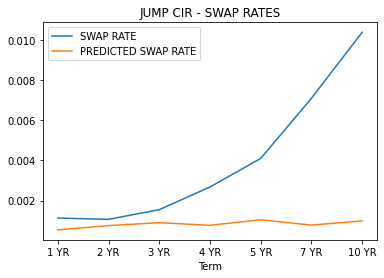

In [203]:
swap_rates['SWAP RATE'] = swap_rates['Mid']
swap_rates['PREDICTED SWAP RATE'] = sr
swap_rates[['SWAP RATE', 'PREDICTED SWAP RATE']].plot(legend=True, title='JUMP CIR - SWAP RATES')

In [195]:
std

array([8.25200589e-05, 2.74714628e-04, 5.25625294e-04, 6.11615439e-04,
       9.35201790e-04, 7.36196881e-04, 1.63808328e-03])

In [198]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])

Term
1 YR     0.000590
2 YR     0.000309
3 YR     0.000648
4 YR     0.001904
5 YR     0.003049
7 YR     0.006307
10 YR    0.009379
dtype: float64

In [200]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[:3].mean()

0.0005153848058978508

In [201]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[4:].mean()

0.006244972527883451

In [202]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE']).mean()

0.003169307474858933